In [1]:
import numpy as np
from scipy.special import gamma

from scipy.integrate import quad

import matplotlib.pyplot as plt

In [2]:

def fx(x):
    return np.sum(x**2)
    
def grad(f, x, epsilon=0.0001):
    g = np.zeros((x.shape[0],) )

    x_temp = x.copy()

    for i in range(x.shape[0]):
        x_temp[i] += epsilon
        if i>0:
            x_temp[i-1] -= epsilon
        g[i] = ((f(x_temp) - f(x)) / epsilon) 
    return g

In [3]:
def optimizer(f, x0, lr=0.1, max_iter=500, return_history=False):
    x = x0
    history = [x]
    for i in range(max_iter):
        x_new = x - lr * grad(f, x)

        if f(x_new) < f(x):
            x = x_new
        else:
            print(f"Updating learning rate: {lr}")
            lr = 0.8*lr
            if lr < 0.1 ** 12:
                print("Early STOP!!!")
                break
            
        history.append(x)
    if return_history:
        return x, history
    else:
        return x

In [4]:
def frac_optimizer(f, x0, lr=0.5, alpha=0.98, max_iter=1000, return_history=False):
    x = x0
    history = [x]
    x_new = x - lr * grad(f, x)
    history.append(x_new)
    indx = 0
    for i in range(max_iter):
       
        x_new_new = history[indx+1] - (lr/gamma(2-alpha)) * grad(f, history[indx]) * np.abs(history[indx+1] - history[indx]) ** (1-alpha)
        if f(x_new_new) < f(history[indx+1]):
            history.append(x_new_new)
            indx += 1
        else:
            
            print(f"Updating learning rate: {lr}")
            lr = 0.8*lr
            if lr < 0.1 ** 12:
                print("Early STOP!!!")
                break
        # history.append(x)
        # print(x)
    if return_history:
        return history[-1], history
    else:
        return history[-1]


In [5]:
def multi_frac_optimizer(f, x0, lr=0.5, alpha1=0.9, alpha2=1.1, max_iter=1000, return_history=False):
    x = x0
    history = [x]
    x_new = x - lr * grad(f, x)
    history.append(x_new)
    indx = 0
    for i in range(max_iter):

        t1 = (1/gamma(2-alpha1)) * grad(f, history[indx]) * np.abs(history[indx+1] - history[indx]) ** (1- alpha1)
        t2 = (1/gamma(2-alpha2)) * grad(f, history[indx]) * np.abs(history[indx+1] - history[indx]) ** (1- alpha2)
       
        x_new_new = history[indx+1] - lr*(0.5*t1 + 0.5*t2)
        if f(x_new_new) < f(history[indx+1]):
            history.append(x_new_new)
            indx += 1
        else:
            
            print(f"Updating learning rate: {lr}")
            lr = 0.8*lr
            if lr < 0.1 ** 12:
                print("Early STOP!!!")
                break
        # history.append(x)
        # print(x)
    if return_history:
        return history[-1], history
    else:
        return history[-1]

In [6]:
def dist_frac_optimizer(f, x0, lr=0.5, alpha1=0.9, alpha2=1.1, N=50, max_iter=1000, return_history=False):
    x = x0
    history = [x]
    x_new = x - lr * grad(f, x)
    history.append(x_new)
    indx = 0

    for i in range(max_iter):

        d_alpha = (alpha2-alpha1)/N
        
        # d = lambda alpha: (1/gamma(2-alpha)) * grad(f, history[indx]) * np.abs(history[indx+1] - history[indx]) ** (1-alpha)
        d = lambda alpha: ((2*(alpha-alpha1))/(gamma(2-alpha)*(alpha2-alpha1)**2)) * grad(f, history[indx]) * np.abs(history[indx+1] - history[indx]) ** (1-alpha)

        delta = 0.5*d(alpha1)
        for n in range(1, N):
            delta = delta + d(alpha1 + n*d_alpha)
        delta = 0.5*d(alpha2)

        x_new_new = history[indx+1] - lr*delta
        if f(x_new_new) < f(history[indx+1]):
            history.append(x_new_new)
            indx += 1
        else:
            
            print(f"Updating learning rate: {lr}")
            lr = 0.8*lr
            if lr < 0.1 ** 12:
                print("Early STOP!!!")
                break
        # history.append(x)
        # print(x)
    if return_history:
        return history[-1], history
    else:
        return history[-1]

In [7]:
x0 = 10*np.ones((200, )) + np.random.random((200, ))

In [8]:
%time x, history_int = optimizer(fx, x0, lr=0.05, return_history=True)

Updating learning rate: 0.05
Updating learning rate: 0.04000000000000001
Updating learning rate: 0.03200000000000001
Updating learning rate: 0.025600000000000008
Updating learning rate: 0.02048000000000001
Updating learning rate: 0.016384000000000006
Updating learning rate: 0.013107200000000006
Updating learning rate: 0.010485760000000005
Updating learning rate: 0.008388608000000004
Updating learning rate: 0.006710886400000004
Updating learning rate: 0.005368709120000003
Updating learning rate: 0.0042949672960000025
Updating learning rate: 0.0034359738368000023
Updating learning rate: 0.002748779069440002
Updating learning rate: 0.002199023255552002
Updating learning rate: 0.0017592186044416017
Updating learning rate: 0.0014073748835532814
Updating learning rate: 0.0011258999068426252
Updating learning rate: 0.0009007199254741002
Updating learning rate: 0.0007205759403792802
Updating learning rate: 0.0005764607523034242
Updating learning rate: 0.00046116860184273935
Updating learning r

In [9]:
%time x, history_frac = frac_optimizer(fx, x0,  lr=0.03, alpha=0.9, return_history=True)

Updating learning rate: 0.03
Updating learning rate: 0.024
Updating learning rate: 0.019200000000000002
Updating learning rate: 0.015360000000000002
Updating learning rate: 0.012288000000000002
Updating learning rate: 0.009830400000000003
Updating learning rate: 0.007864320000000003
Updating learning rate: 0.0062914560000000026
Updating learning rate: 0.005033164800000003
Updating learning rate: 0.004026531840000003
Updating learning rate: 0.0032212254720000023
Updating learning rate: 0.002576980377600002
Updating learning rate: 0.0020615843020800016
Updating learning rate: 0.0016492674416640014
Updating learning rate: 0.0013194139533312013
Updating learning rate: 0.001055531162664961
Updating learning rate: 0.0008444249301319689
Updating learning rate: 0.0006755399441055751
Updating learning rate: 0.0005404319552844601
Updating learning rate: 0.0004323455642275681
Updating learning rate: 0.0003458764513820545
Updating learning rate: 0.0002767011611056436
Updating learning rate: 0.0002

In [10]:
%time x, history_multi_frac = multi_frac_optimizer(fx, x0,  lr=0.03, alpha1=1.1, alpha2=0.9, return_history=True)

Updating learning rate: 0.03
Updating learning rate: 0.024
Updating learning rate: 0.019200000000000002
Updating learning rate: 0.015360000000000002
Updating learning rate: 0.012288000000000002
Updating learning rate: 0.009830400000000003
Updating learning rate: 0.007864320000000003
Updating learning rate: 0.0062914560000000026
Updating learning rate: 0.005033164800000003
Updating learning rate: 0.004026531840000003
Updating learning rate: 0.0032212254720000023
Updating learning rate: 0.002576980377600002
Updating learning rate: 0.0020615843020800016
Updating learning rate: 0.0016492674416640014
Updating learning rate: 0.0013194139533312013
Updating learning rate: 0.001055531162664961
Updating learning rate: 0.0008444249301319689
Updating learning rate: 0.0006755399441055751
Updating learning rate: 0.0005404319552844601
Updating learning rate: 0.0004323455642275681
Updating learning rate: 0.0003458764513820545
Updating learning rate: 0.0002767011611056436
Updating learning rate: 0.0002

In [11]:
%time x, history_dist_frac = dist_frac_optimizer(fx, x0,  lr=0.03, alpha1=0.1, alpha2=1.1, return_history=True)

Updating learning rate: 0.03
Updating learning rate: 0.024
Updating learning rate: 0.019200000000000002
Updating learning rate: 0.015360000000000002
Updating learning rate: 0.012288000000000002
Updating learning rate: 0.009830400000000003
Updating learning rate: 0.007864320000000003
Updating learning rate: 0.0062914560000000026
Updating learning rate: 0.005033164800000003
Updating learning rate: 0.004026531840000003
Updating learning rate: 0.0032212254720000023
Updating learning rate: 0.002576980377600002
Updating learning rate: 0.0020615843020800016
Updating learning rate: 0.0016492674416640014
Updating learning rate: 0.0013194139533312013
Updating learning rate: 0.001055531162664961
Updating learning rate: 0.0008444249301319689
Updating learning rate: 0.0006755399441055751
Updating learning rate: 0.0005404319552844601
Updating learning rate: 0.0004323455642275681
Updating learning rate: 0.0003458764513820545
Updating learning rate: 0.0002767011611056436
Updating learning rate: 0.0002

In [78]:
fx_int = list(map(lambda x: fx(x), history_int))
fx_frac = list(map(lambda x: fx(x), history_frac))
fx_multi_frac = list(map(lambda x: fx(x), history_multi_frac))
fx_dist_frac = list(map(lambda x: fx(x), history_dist_frac))

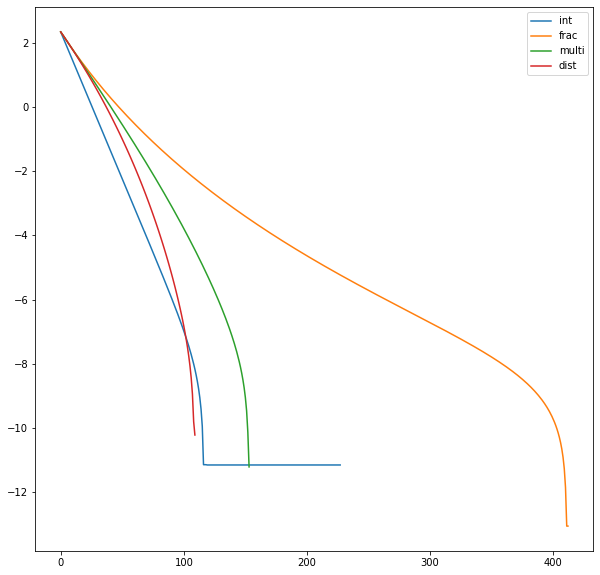

In [79]:
plt.figure(figsize=(10, 10))


plt.plot(np.log10(np.array(fx_int)), label='int')
plt.plot(np.log10(np.array(fx_frac)), label='frac')
plt.plot(np.log10(np.array(fx_multi_frac)), label='multi')
plt.plot(np.log10(np.array(fx_dist_frac)), label='dist')

plt.legend();

In [1]:
import torch

In [2]:
x = torch.rand(2)

In [5]:
x.device

device(type='cpu')

# TEST 1

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader, random_split
import numpy as np
# import matplotlib.pyplot as plt
import argparse
import time
import pickle 
import os
from grads import grads
from operators import operators
from models.resnet import ResNet18
from tqdm import tqdm
# Define model
def init_model(args):
    if args.torch:
        from torch.optim.rmsprop import RMSprop as RMSProp
        from torch.optim.adam import Adam
        from torch.optim.adagrad import Adagrad as AdaGrad
        from torch.optim.sgd import SGD
    else:
        from pytorch_optim import SGD, AdaGrad, RMSProp, Adam

    if args.model == 'fc1':
        model = Net(1, 2)
    if args.model == 'resnet18':
        model = ResNet18(10)
    model = model.to(args.device)
    criterion = nn.CrossEntropyLoss().to(args.device)
    # criterion = nn.MSELoss().to(args.device)
    
    if args.grad == 'grad':
        # G = grads.grad
        G = torch.autograd.grad
    elif args.grad == 'Ggamma':
        G = grads.Ggamma
    elif args.grad == 'Glearning_rate':
        G = grads.Glearning_rate
    elif args.grad == 'Reimann_Liouville':
        G = grads.Reimann_Liouville
    elif args.grad == 'Caputo':
        G = grads.Caputo
    elif args.grad == 'Reimann_Liouville_fromG':
        G = grads.Reimann_Liouville_fromG
    elif args.grad == 'Caputo_fromG':
        G = grads.Caputo_fromG
    else:
        raise ValueError(f"Unknown gradient function: {args.grad}")

    OPT = operators(G, alpha1=args.alphas[0], alpha2=args.alphas[1])

    if args.operator == "integer":
        OPT = None
    elif args.operator == "fractional":
        OPT = OPT.fractional
    elif args.operator == "multi_fractional":
        OPT = OPT.multi_fractional
    elif args.operator == "distributed_fractional":
        OPT = OPT.distributed_fractional
    else:
        raise ValueError(f"Unknown operator: {args.operator}")

    if args.torch:
        if args.optimizer == "sgd":
            OPTIM = SGD(model.parameters(), lr=args.lr)
        elif args.optimizer == "adagrad":
            OPTIM = AdaGrad(model.parameters(), lr=args.lr)
        elif args.optimizer == "rmsprop":
            OPTIM = RMSProp(model.parameters(), lr=args.lr)
        elif args.optimizer == "adam":
            OPTIM = Adam(model.parameters(), lr=args.lr)
        else:
            raise ValueError(f"Unknown optimizer: {args.optimizer}")
    else:
        if args.optimizer == "sgd":
            OPTIM = SGD(model.parameters(), OPT, lr=args.lr)
        elif args.optimizer == "adagrad":
            OPTIM = AdaGrad(model.parameters(), OPT, lr=args.lr)
        elif args.optimizer == "rmsprop":
            OPTIM = RMSProp(model.parameters(), OPT, lr=args.lr)
        elif args.optimizer == "adam":
            OPTIM = Adam(model.parameters(), OPT, lr=args.lr)
        else:
            raise ValueError(f"Unknown optimizer: {args.optimizer}")
        
    return OPTIM, model, criterion

# Define the neural network model
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        # self.fc1 = nn.Linear(input_size, output_size, bias=False)
        self.fc1 = nn.Linear(input_size, output_size)
        # self.relu1 = nn.ReLU()
        # self.fc3 = nn.Linear(hidden_size, output_size)
        # self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        # x = x.view(-1, 32*32*3)
        out = self.fc1(x)
        # out = self.relu1(out)
        # out = self.fc3(out)
        # out = self.softmax(out)
        return out

# Load and preprocess the MNIST dataset
# def load_mnist():
#     # transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
#     transform = transforms.Compose([transforms.ToTensor()])
#     train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
#     test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)
    
#     train_size = int(0.8 * len(train_dataset))
#     val_size = len(train_dataset) - train_size
#     train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])
    
#     train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
#     val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
#     test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)
    
#     return train_loader, val_loader, test_loader


def load_cifar10():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])
    
    train_dataset = CIFAR10(root='D:/Datasets/data', train=True, transform=transform, download=True)
    test_dataset = CIFAR10(root='D:/Datasets/data', train=False, transform=transform, download=True)
    
    train_size = int(0.8 * len(train_dataset))
    val_size = len(train_dataset) - train_size
    train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])
    
    train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)
    
    return train_loader, val_loader, test_loader

# Train the model
def train_model(model, train_loader, val_loader, criterion, optimizer, args, epochs=5):
    pickle_saver={}
    # save_path = f'./run/exp_{args.dataset}_{args.learning_rate}_{args.optimizer}_epochs_{epochs}/'
    root_addr = f'./run/exp_{args.exp_idx}/'

    while os.path.exists(root_addr):
        args.exp_idx += 1
        root_addr = root_addr.split('_')[0] + '_' +  str(args.exp_idx) + '/'
        
    os.makedirs(root_addr)
    print(root_addr)
    save_path = root_addr + f'cifar10_{args.model}_{args.lr}_{args.optimizer}_epochs_{epochs}_{args.operator}_alpha1_{args.alphas[0]}_alpha2_{args.alphas[1]}/'
    model_save_path = os.path.join(save_path, 'models')
    os.makedirs(model_save_path, exist_ok=True)
    
    for epoch in range(epochs):
        model.train()
        train_loss = []
        batch_time = []
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in tqdm(train_loader):
            images = images.to(args.device)
            labels = labels.to(args.device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            s = time.time()
            loss.backward(create_graph=True)
            optimizer.step()
            e = time.time()
            batch_time.append(e-s)
            train_loss.append(loss.item())
            
            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        accuracy = 100 * correct / total
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {np.mean(train_loss):.16f}, Accuracy: {accuracy:.2f}%, batch mean time: {np.mean(batch_time)}, epoch optimization time: {np.sum(batch_time)}')
        pickle_saver[epoch+1] = {'batch_time': batch_time, 'train_loss': train_loss, 'accuracy': accuracy}

    save_results(pickle_saver, filename=os.path.join(save_path, 'training_results.pkl'))
    return train_loss


def save_results(results, filename):
    with open(filename, 'wb') as file:
        pickle.dump(results, file)

# Validate the model
def validate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.view(-1, 28*28)
            labels = torch.nn.functional.one_hot(labels, num_classes=10).float()
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
    
    print(f'Validation Loss: {val_loss/len(val_loader):.4f}')

# Evaluate the model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    te_loss = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            te_loss += loss.item()
    
    print(f'Test Accuracy: {100 * correct / total:.2f}%')
    return te_loss/len(test_loader)


def display_loss(train_loss):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_loss) + 1), train_loss, marker='o', linestyle='-', color='b')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.xticks(range(1, len(train_loss) + 1))  # To show all epochs on x-axis
    plt.show()


from torch.optim import SGD as psgd
    
def main():
       
    grad_funcs = ['grad', 'Ggamma', 'Glearning_rate', 'Reimann_Liouville', 'Caputo', 'Reimann_Liouville_fromG', 'Caputo_fromG']
    opers = ['integer', 'fractional', 'multi_fractional', 'distributed_fractional']
    optims = ['sgd', 'adagrad', 'rmsprop', 'adam']

    parser = argparse.ArgumentParser()
    parser.add_argument('--lr', default=0.1, type=float)
    parser.add_argument('--grad', default='grad', choices=grad_funcs)
    parser.add_argument('--operator', default='multi_fractional', choices=opers)
    parser.add_argument('--optimizer', default='sgd', choices=optims)
    parser.add_argument('--model', default='fc1')
    parser.add_argument('--alphas', type=str, default="[0.9, 1.1]")
    parser.add_argument('--exp_idx', type=int, default=0)
    parser.add_argument('--device', type=str, default='cuda')
    parser.add_argument('--torch', action="store_true")
    parser.add_argument('--gpu', type=int, default=0)


    args = parser.parse_args()

    args.alphas = [float(x) for x in eval(args.alphas)]
    my_seed = 1
    import random
    torch.manual_seed(my_seed)
    np.random.seed(my_seed)
    random.seed(my_seed)
    
    if args.device == 'cuda':    
        os.environ['CUDA_VISIBLE_DEVICES']='0,1'
        args.device=f'cuda:{args.gpu}'

    train_loader, val_loader, test_loader = load_cifar10()
    
    input_size = 32 * 32 * 3  # CIFAR-10 image size (32x32) with 3 color channels
    hidden_size = 256
    output_size = 10

    return args
    

In [55]:
import sys
sys.argv = ['', '--operator', 'distributed_fractional', '--device', 'cuda', '--optimizer', 'adam']
args = main()

Files already downloaded and verified
Files already downloaded and verified


In [56]:
optimizer, model, criterion = init_model(args)

In [57]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.data = torch.cat([torch.ones((500000, 1)), torch.ones((500000, 1)) * 2])
        self.label = torch.cat([torch.zeros(500000).long(), torch.ones(500000).long()])
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img = self.data[idx]            
        l = self.label[idx]            
        return img, l

In [58]:
dataset = MyDataset()
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [59]:
model.train()
train_loss = []
batch_time = []
running_loss = 0.0
correct = 0
total = 0
for images, labels in tqdm(train_loader):
    images = images.to(args.device)
    labels = labels.to(args.device)
    
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    s = time.time()
    loss.backward(create_graph=True)
    optimizer.step()
    e = time.time()
    batch_time.append(e-s)
    train_loss.append(loss.item())
    
    # Calculate accuracy
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    

100%|██████████| 15625/15625 [03:08<00:00, 83.11it/s]


In [60]:
for params in model.parameters():
    print(params)

Parameter containing:
tensor([[-13.9830],
        [ 14.1397]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 20.7708, -21.2130], device='cuda:0', requires_grad=True)


In [61]:
softmax = torch.nn.Softmax()

In [62]:
model(torch.tensor([1.]).to(args.device)), softmax(model(torch.tensor([1.]).to(args.device)))

(tensor([ 6.7878, -7.0733], device='cuda:0', grad_fn=<ViewBackward0>),
 tensor([1.0000e+00, 9.5534e-07], device='cuda:0', grad_fn=<SoftmaxBackward0>))

In [63]:
model(torch.tensor([2.]).to(args.device)), softmax(model(torch.tensor([2.]).to(args.device)))

(tensor([-7.1951,  7.0663], device='cuda:0', grad_fn=<ViewBackward0>),
 tensor([6.4020e-07, 1.0000e+00], device='cuda:0', grad_fn=<SoftmaxBackward0>))